# Individual Assignment 1

## Requirement 1 

### Create Pandas dataframe for training and testing data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [47]:
# read training data from file
training_data = pd.read_csv(r"C:\Users\User\Documents\Singapore Institute of Management - Bachelor\CSCI316 - Big Data Mining Techniques and Implementation\Individual Assignment 1\customer_churn_dataset-training-master.csv")
print("Number of samples: %d" % len(df))
training_data.head()

Number of samples: 440832


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [48]:
# read testing data from file
testing_data = pd.read_csv(r"C:\Users\User\Documents\Singapore Institute of Management - Bachelor\CSCI316 - Big Data Mining Techniques and Implementation\Individual Assignment 1\customer_churn_dataset-testing-master.csv")
print("Number of samples: %d" % len(testing_data))
testing_data.head()

Number of samples: 64374


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


## Requirement 2

### Clean missing values

In [49]:
# Check the null value in each columns
training_data.isnull().sum()
print(len(training_data))

440833


In [50]:
df = training_data.dropna()

In [51]:
# to ensure no more null value exists
df.isnull().sum()
print(len(df))

440832


## Requirement 3

### Z-score normalisation

In [52]:
# find z-score for each data in Last Interaction
df['Last Interaction ZScore'] = (df['Last Interaction'] - (df['Last Interaction'].mean())) / df['Last Interaction'].std()
# print z-score for each data in Last Interaction
print(df['Last Interaction ZScore'])
# print z-score mean in Last Interaction
print('Last Interaction ZScore Mean: ', np.mean(df['Last Interaction ZScore']))
# print z-score variance in Last Interaction
print('Last Interaction ZScore Variance: ', np.var(df['Last Interaction ZScore']))

0         0.293052
1        -0.986582
2        -1.335574
3         1.689016
4         0.642043
            ...   
440828   -0.753922
440829   -1.451904
440830   -0.637591
440831   -1.451904
440832    0.758373
Name: Last Interaction ZScore, Length: 440832, dtype: float64
Last Interaction ZScore Mean:  5.054673933252745e-17
Last Interaction ZScore Variance:  0.9999977315621372


C:\Users\User\AppData\Local\Temp\ipykernel_12748\191676646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Interaction ZScore'] = (df['Last Interaction'] - (df['Last Interaction'].mean())) / df['Last Interaction'].std()


## Requirement 4

### 5 Bins



Total Spend Bins
High         117218
Very High    116584
Normal       102502
Moderate      52303
Low           52225
Name: count, dtype: int64
Difference between number of records and number in bins is : 0


C:\Users\User\AppData\Local\Temp\ipykernel_12748\3010358264.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Spend Bins'] = pd.cut(df_total_spend, bins=total_spend_bins, labels=labels, include_lowest=True) # include minimum val, which is 100


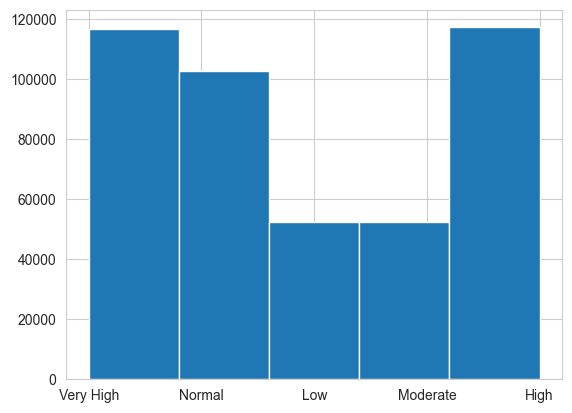

In [53]:
# create new variable to represent data in Total Spend
df_total_spend = df['Total Spend']

# find min and max value to identify how large is the range
minValue = df_total_spend.min()
maxValue = df_total_spend.max()

# equally distribute the range into 5 groups
total_spend_bins = np.linspace(minValue, maxValue, 6) # 6 represent 6 edges

# give names to 5 groups 
labels = ['Low', 'Moderate', 'Normal', 'High', 'Very High']

# throw numeric data into my designated bins
df['Total Spend Bins'] = pd.cut(df_total_spend, bins=total_spend_bins, labels=labels, include_lowest=True) # include minimum val, which is 100

# how result distributed in histogram
plt.hist(df['Total Spend Bins'], bins = 5)

#total number of each bin
val_count = df['Total Spend Bins'].value_counts()
print (val_count)

# find the difference between (total number of data in bins) and (total number of data in dataframe) 
diff = len(df) - val_count.sum()
print ('Difference between number of records and number in bins is :', diff)

## Requirement 5

### One-hot-encoding

In [54]:
#Create data
df_contract_length = pd.DataFrame({'contract_length': ['monthly', 'quarterly', 'yearly']})

df_contract_length_one_hot = pd.DataFrame({'contract_length': ['monthly', 'quarterly', 'yearly']})

df_contract_length_one_hot = pd.get_dummies(df['Contract Length'], prefix='contract_length')



#view contract length dataframe

medium = df['Contract Length']
df['Contract Length One Hot']  = medium

one_hot = pd.get_dummies(df['Contract Length One Hot'], prefix='contract_length')


for row in range(df.shape[0]):
    df['Contract Length One Hot'].at[row] = str(one_hot.iloc[row,0])+','+str(one_hot.iloc[row,1])+','+str(one_hot.iloc[row,2])
print(df['Contract Length One Hot'])

C:\Users\User\AppData\Local\Temp\ipykernel_12748\1133356993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract Length One Hot']  = medium
C:\Users\User\AppData\Local\Temp\ipykernel_12748\1133356993.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract Length One Hot'].at[row] = str(one_hot.iloc[row,0])+','+str(one_hot.iloc[row,1])+','+str(one_hot.iloc[row,2])


0         True,False,False
1         False,True,False
2         False,False,True
3         False,True,False
4         False,True,False
                ...       
440828    True,False,False
440829    False,False,True
440830    False,False,True
440831    False,False,True
440832           Quarterly
Name: Contract Length One Hot, Length: 440832, dtype: object


In [55]:
print(df)

        CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0              

## Requirement 6


### Define new attribute

1. Service Usage Ratio: (Support Calls / Usage Frequency)


This attribute calculates the ratio of the number of customer support calls to the total usage frequency. It provides insights into how frequently customers require assistance relative to their overall product or service usage. Higher values may indicate potential issues or dissatisfaction that need to be addressed.

2. Payment Delay Indicator: (Binning Payment Delay)

 This attribute categorizes customers based on their payment behavior. It can be defined as "On Time," "Delayed," or "Missed" payments. Analyzing this attribute can help identify customers who may be facing financial difficulties or those who are consistently punctual with their payments.

3. Total Spend per Service: (Total Spend / Usage Frequency)

This attribute calculates the total amount spent by each customer on the different services provided by the company. By analyzing this attribute, businesses can identify which services contribute the most to their revenue and customer retention efforts. It also helps to recognize customers with high spending across various services, which may indicate higher engagement and loyalty.

4. Customer Tenure Group: (Binning Tenure)

This attribute categorizes customers based on their tenure with the company. It can be defined as "New," "Intermediate," or "Long-Term" based on predefined cutoffs, such as customers with a tenure of less than 1 month, between 1 month and 2 months, and more than 2 months, respectively. This attribute helps identify the loyalty and engagement levels of customers based on their relationship duration with the company.

5. Subscriber Age Group: (Binning Age) 

Categorize customers into age groups, such as "Young Adults," "Middle-Aged," and "Seniors," based on age. Age groups may exhibit different churn behaviors.